# **Hand Written digits detection using Convolutional Neural Network**

## **Imports**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import numpy as np
import pandas as pd
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

## **Loading MNIST Dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## **Data Normalizaton**
* Scaling the data to be between 0 and 1.

In [ ]:
X_train, X_test = X_train/255.0, X_test/255.0

## **Flatting the Data**
* Making the data flat which means make with one dimension.

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

## **Building the CNN Classifire**

### **Setting the model parameters and hidden layers**

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10, activation='softmax')
]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **Training the model**

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 38ms/step - accuracy: 0.9126 - loss: 0.2870
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 31ms/step - accuracy: 0.9855 - loss: 0.0467
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9910 - loss: 0.0278
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9941 - loss: 0.0188
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9956 - loss: 0.0121


### **Model Evaluation**

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy: ', test_acc, "\nTest loss: ", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9872 - loss: 0.0369
Test accuracy:  0.9904999732971191 
Test loss:  0.028701843693852425


### **Making predictions**

In [ ]:
y_predict = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predict]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


### **Visualizing the confusion Matrix**

Text(95.72222222222221, 0.5, 'Truth')

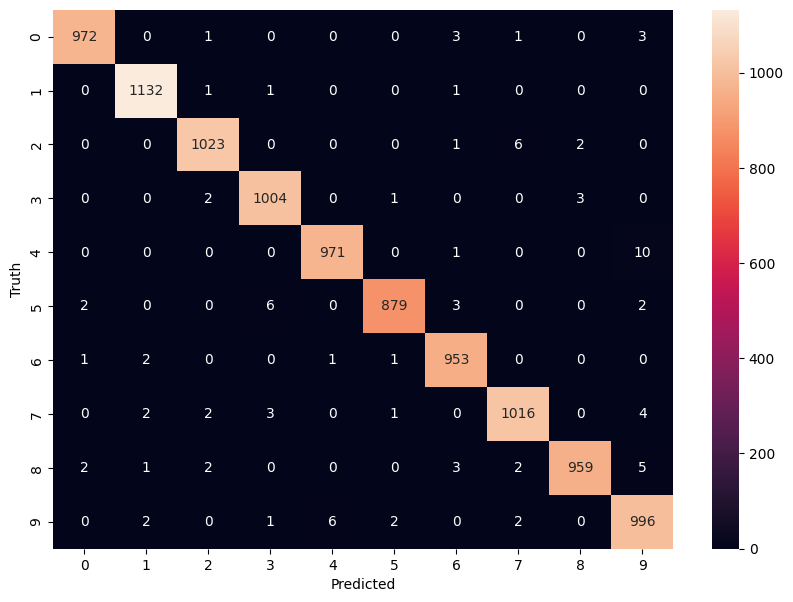

In [ ]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


### **Making some predictions to test the model**

In [ ]:
predicted = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [ ]:
predicted[0]

array([2.7288014e-08, 3.0308900e-08, 8.2885447e-07, 5.9339291e-06,
       6.7255542e-08, 3.9211017e-09, 3.6493372e-13, 9.9998885e-01,
       8.4451699e-08, 4.0613099e-06], dtype=float32)

In [ ]:
np.argmax(predicted[5])

1

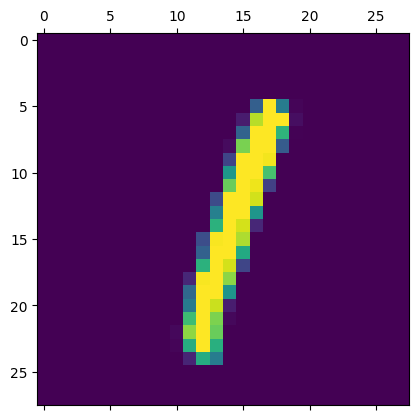

In [ ]:
plt.matshow(X_test[5])

### **Saving the model**

In [ ]:
import pickle

with open('MNIST_CNN_Classifier_model.pkl', 'wb') as file:
    pickle.dump(model, file)